# Proyecto 1 modelos avanzados para el análisis de datos 1

### Analisis de series de tiempo en el sector del entretenimiento 

**Fecha de Entrega:**22 de junio de 2020

**Grupo de trabajo:**

    Camilo Andrés Angarita Ortiz    (código: 201111642)
    David Tavera Sánchez            (código: 201016123)
    Jaime Orjuela Viracachá         (código: 201924252)
    Carolina Padilla Hernández      (código: 201111402)



### Descripción del problema

En la industria del entretenimiento musical, una de las inversiones más altas en las que tiene que incurrir el organizador de un evento es la pauta publicitaria que este hará para hacer conocer el mismo. De esta manera, para este proyecto como grupo decidimos abordar esta problematica teniendo la situación hipotetica de un empresario que tiene dentro de su portafolio de eventos al Jamming Festival, el festival Estereo Picnic, y Rock al Parque. Con estos eventos lo que se quiere es revisar si existe alguna correlación entre las busquedas de los mismos para entender si puede generar alguna sinergia y eficiencia en los momentos de inversión para la pauta de los mismos. 

Ademas de esto, el empresario quiere revisar cual es la relación que tienen estos eventos con las busquedas de la palabra "Electronica" dado que quiere entender el comportamiento o la demanda en busquedas de este género y la relación que tiene con el comportamiento de las busquedas de sus eventos, con el fin de determinar la viabilidad de montar un nuevo evento que aporte a la eficiencia en el contrato de pauta que piensa generar con la agencia de publicidad. 

Finalmente lo que se quiere hacer es proyectar el comportamiento de las busquedas en el futuro con el fin de revisar el posible potencial de publico que veria la pauta contratada. A partir de esto, para el análisis se descargó de Google trends la data correspondiente a las busquedas de " Jamming Festival", "Rock al Parque", "Festival Estereo Picnic"  y "Electronica" desde junio del 2015 hasta junio del 2020 con el fin de utilizar estas series de tiempo en la solución de la problematica planteada. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot


%matplotlib inline
sns.set()

In [2]:
# Definir path
#%cd C:\Users\carol\OneDrive - Universidad de los Andes\CPH\MIIA\INTERSEMESTRAL\MODELOS AVANZADOS 1\Semana1\Proyecto
df= pd.read_csv('./Multitimeline.csv')
df.head()

,Semana,Electrónica: (Colombia),Jamming Festival: (Colombia),Rock al Parque: (Colombia),Festival Estéreo Picnic: (Colombia)
0,2015-06-21,6,<1,16,<1
1,2015-06-28,7,<1,8,<1
2,2015-07-05,6,<1,6,<1
3,2015-07-12,7,<1,10,<1
4,2015-07-19,6,<1,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 5 columns):
Semana                                 261 non-null object
Electrónica: (Colombia)                261 non-null int64
Jamming Festival: (Colombia)           261 non-null object
Rock al Parque: (Colombia)             261 non-null object
Festival Estéreo Picnic: (Colombia)    261 non-null object
dtypes: int64(1), object(4)
memory usage: 10.3+ KB


In [4]:
df.columns = ['week', 'Electronica', 'Jamming', 'Rock', 'Estereo']
df.head()

,week,Electronica,Jamming,Rock,Estereo
0,2015-06-21,6,<1,16,<1
1,2015-06-28,7,<1,8,<1
2,2015-07-05,6,<1,6,<1
3,2015-07-12,7,<1,10,<1
4,2015-07-19,6,<1,8,1


In [5]:
df.week = pd.to_datetime(df.week)
df.set_index('week', inplace=True)

df.head()

,Electronica,Jamming,Rock,Estereo
week,,,,
2015-06-21,6,<1,16,<1
2015-06-28,7,<1,8,<1
2015-07-05,6,<1,6,<1
2015-07-12,7,<1,10,<1
2015-07-19,6,<1,8,1


In [6]:
df=df.replace("<1",0)
df.head()

,Electronica,Jamming,Rock,Estereo
week,,,,
2015-06-21,6,0,16,0
2015-06-28,7,0,8,0
2015-07-05,6,0,6,0
2015-07-12,7,0,10,0
2015-07-19,6,0,8,1


In [7]:
df['Jamming']=df['Jamming'].astype(str).astype(int)
df['Rock']=df['Rock'].astype(str).astype(int)
df['Estereo']=df['Estereo'].astype(str).astype(int)
df.dtypes

Electronica    int64
Jamming        int32
Rock           int32
Estereo        int32
dtype: object

In [8]:
pd.plotting.deregister_matplotlib_converters()

In [9]:
pd.plotting.register_matplotlib_converters()

Text(0.5, 0, 'Year')

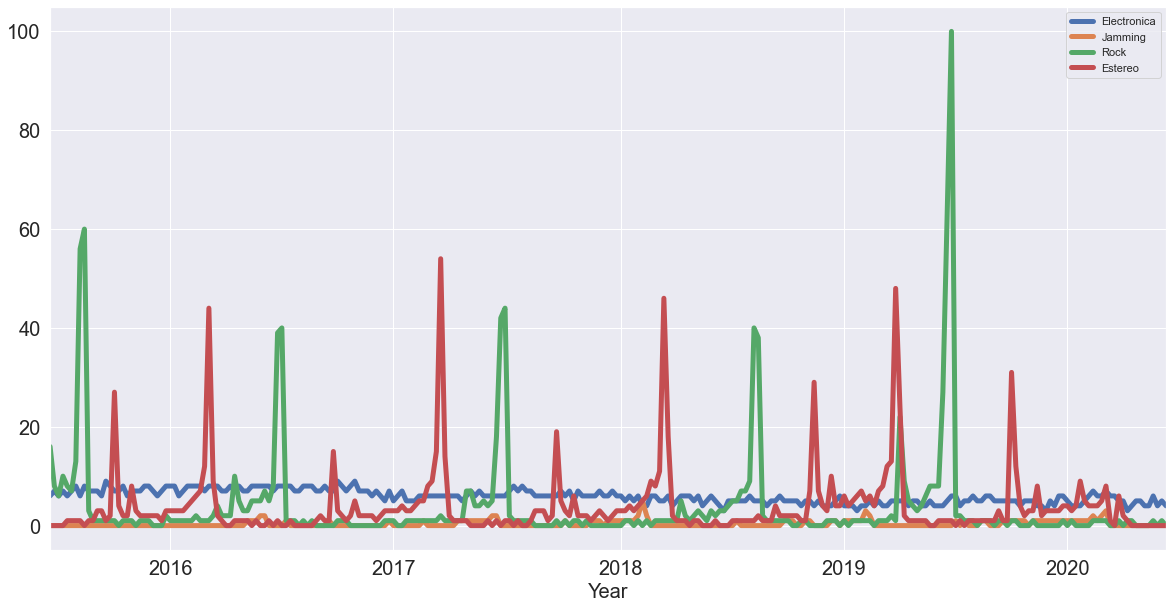

In [10]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

A simple vista se observa estacionalidad en los festivales de Rock al Parque y Estereo Picnic. Jamming se considera un festival de nicho. Por otro lado, las búsquedades del género Electrónica son constantes en el tiempo. 

### Correlación

In [11]:
df.corr()

,Electronica,Jamming,Rock,Estereo
Electronica,1.000000,-0.167242,0.050712,-0.070553
Jamming,-0.167242,1.000000,-0.106616,-0.017262
Rock,0.050712,-0.106616,1.000000,-0.093757
Estereo,-0.070553,-0.017262,-0.093757,1.000000


Al gráficar las series y encontrar sus correlaciones, no se evidencia un correlación entre los diferentes festivales de música y el género electrónica. 

## Tendencia

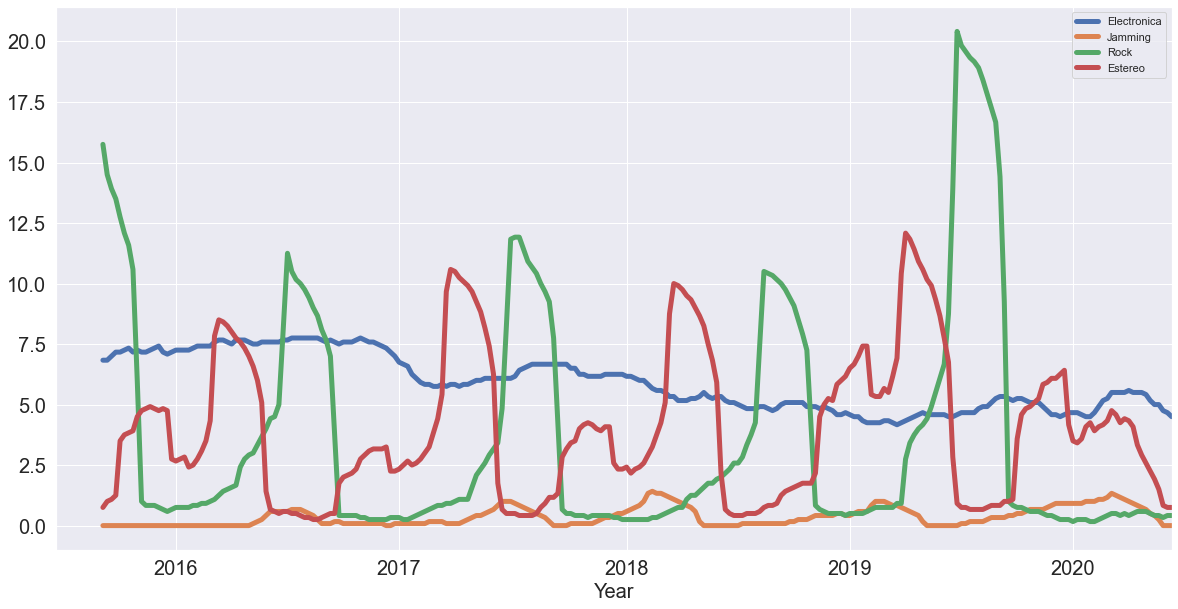

In [12]:
df[['Electronica', 'Jamming', 'Rock', 'Estereo']].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

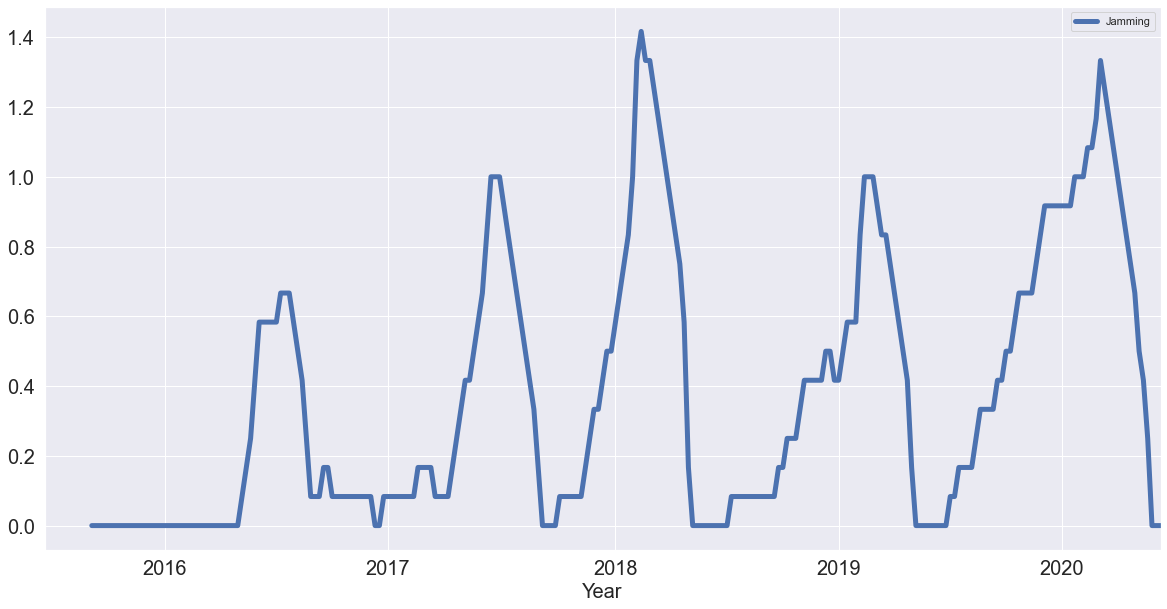

In [13]:
Ja  =  df [[ 'Jamming' ]] 
Ja.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

No se evidencia ninguna tendencia en los tres festivales. Sin embargo, Electrónica tiene una tendencia a la baja a lo largo del tiempo. 

## Estacionalidad 

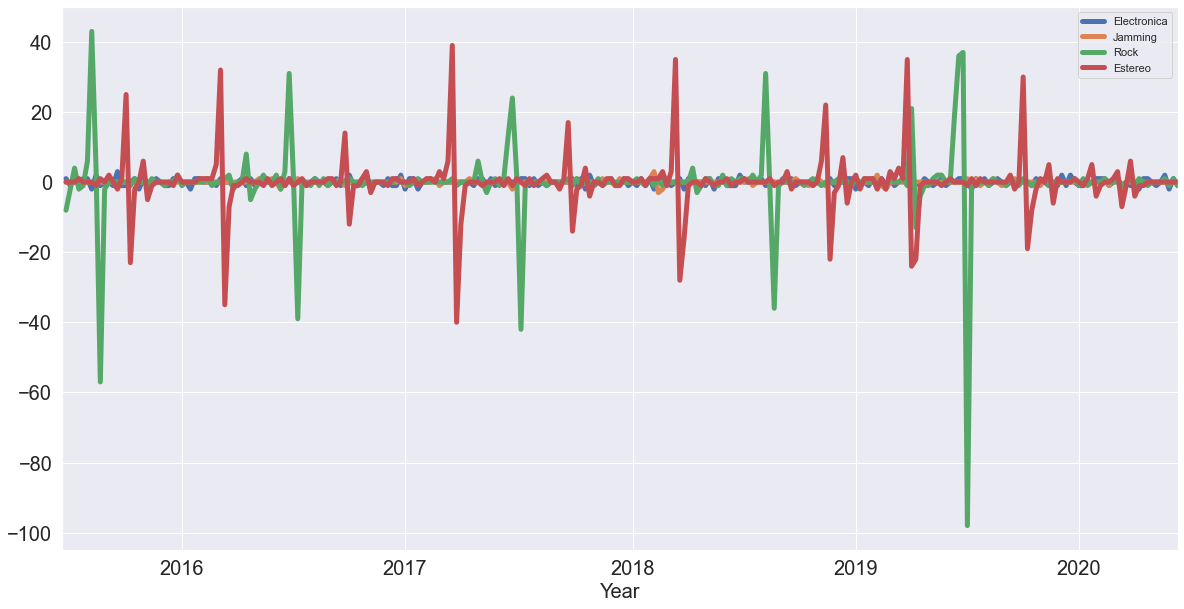

In [14]:
df[['Electronica', 'Jamming', 'Rock', 'Estereo']].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

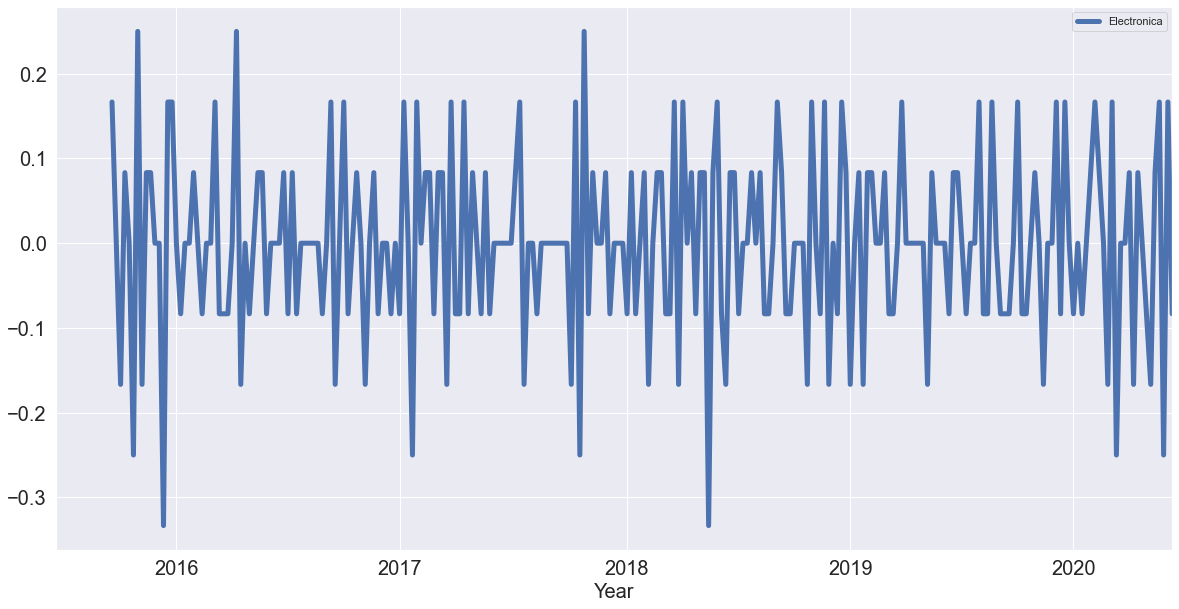

In [15]:
df[['Electronica']].diff().diff().rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Los tres festivales tienen una estacionalidad anual en diferentes momentos del año. Por el contrario, al realizar dos diferencias no se observa una estacionalida marcada.  

### Dickey Fuller Test

In [16]:
columns=df.columns

for i in columns:

    result = adfuller(df[i])
    print('La serie', i)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

La serie Electronica
ADF Statistic: -1.572335
p-value: 0.497474
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
La serie Jamming
ADF Statistic: -5.754653
p-value: 0.000001
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
La serie Rock
ADF Statistic: -9.268091
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
La serie Estereo
ADF Statistic: -10.248246
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


Sin realizar diferencias, se observa que las series de los festivales Jamming, Rock y Estereo Picnic, no rechazan la hipotesis nula, es decir son estacionarias. Sin embargo, la serie electrónica rechaza la hipotesis nula. Por lo tanto, se necesita aplicar diferencias para convertirla en estacionaria.  

### Con una diferencia

In [17]:
columns=df.columns

for i in columns:

    result = adfuller(df[i].diff().iloc[1:])
    print('La serie', i)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

La serie Electronica
ADF Statistic: -10.475407
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
La serie Jamming
ADF Statistic: -11.958611
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
La serie Rock
ADF Statistic: -8.383327
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
La serie Estereo
ADF Statistic: -8.551901
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


Aplicando diferencias de primer orden, se observa que las cuatro series no rechazan la hipotesis nula del Test de Dickey Fuller, es decir son estacionarias. 

### Correlación de diferencias primer orden

In [18]:
df.diff().corr()

,Electronica,Jamming,Rock,Estereo
Electronica,1.000000,0.006999,0.014184,-0.046459
Jamming,0.006999,1.000000,-0.115558,-0.019942
Rock,0.014184,-0.115558,1.000000,-0.001360
Estereo,-0.046459,-0.019942,-0.001360,1.000000


Aplicando diferencias de primer orden, no se observa correlación entre ningunos de los festivales, debido a que cada uno se realiza en diferentes momentos del año. Además, no se observa una correlación entre el género músical de la Electrónica y estos festivales. 

### Autocorrelación 

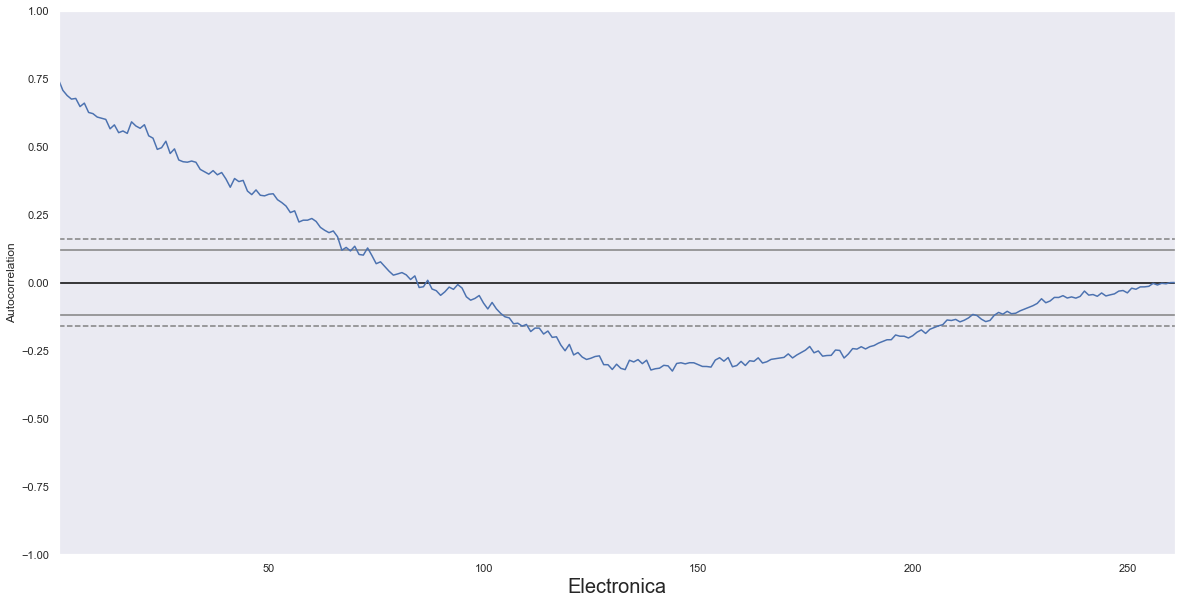

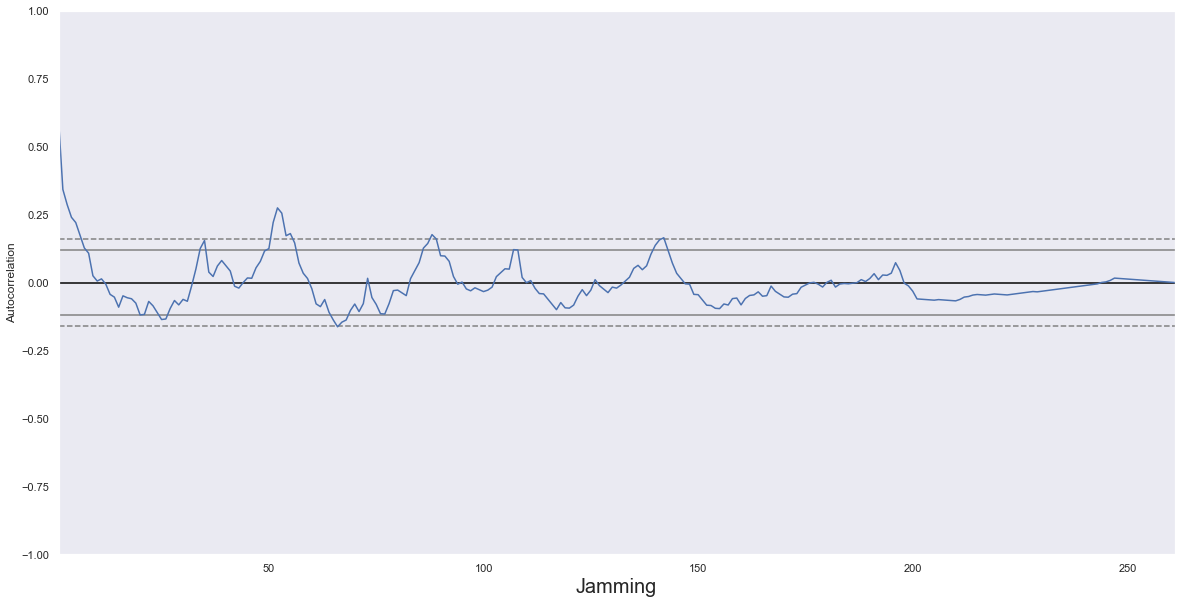

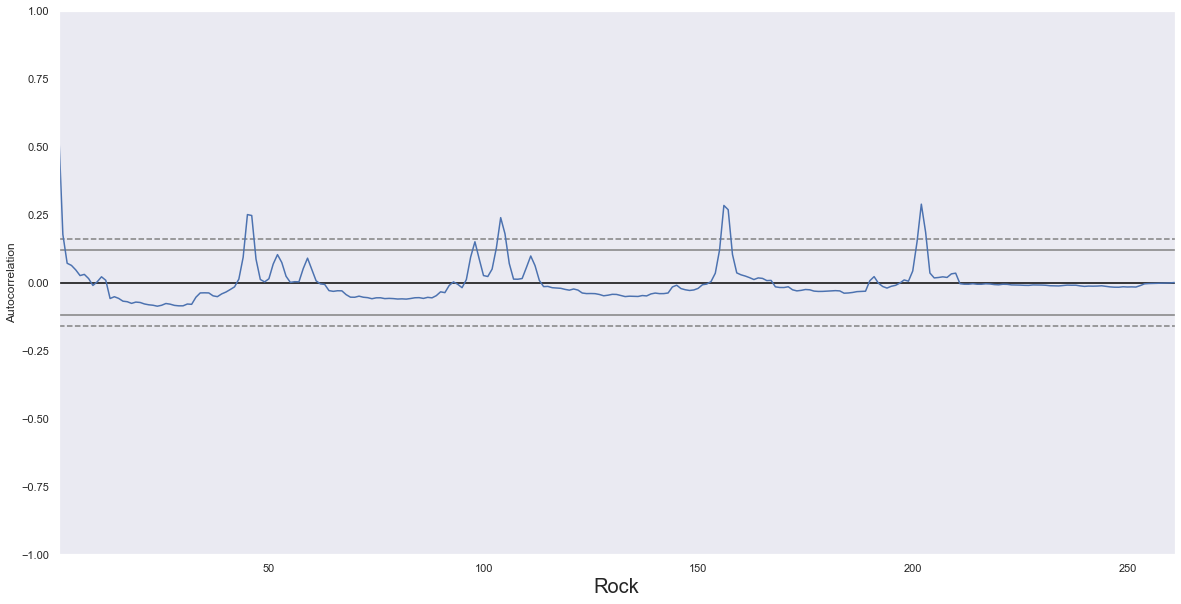

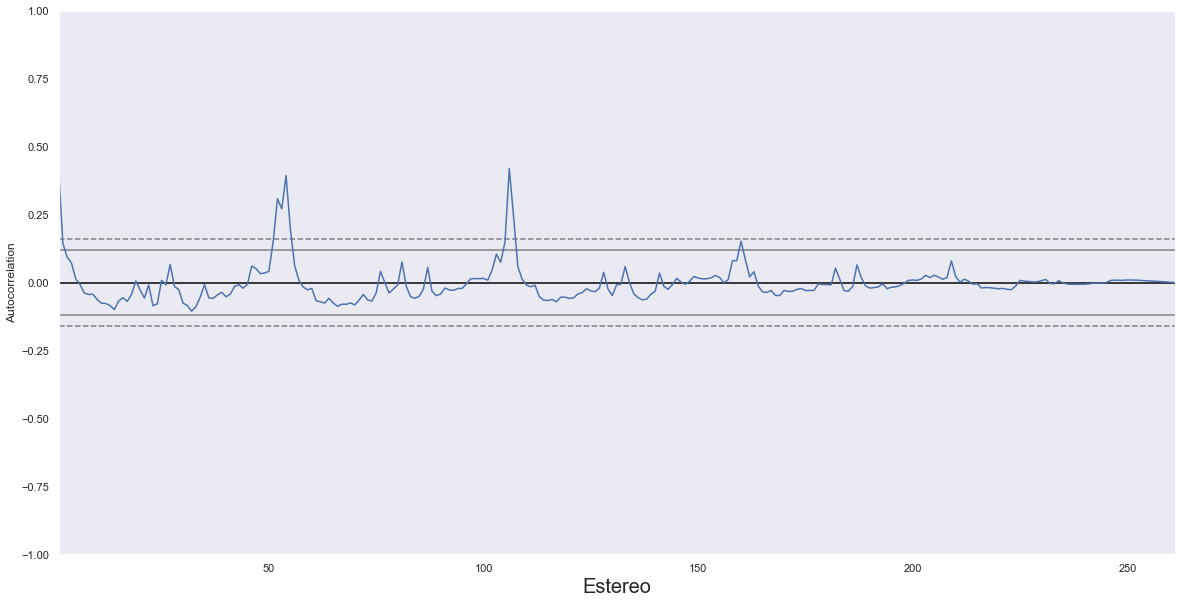

In [19]:
columns=df.columns

for i in columns:
   
    plt.figure(figsize=(20,10))
    pd.plotting.autocorrelation_plot(df[i]);
    plt.xlabel(i, fontsize=20);

A partir de las autocorrelaciones se puede concluir que los tres festivales tienen estacionalidades aproximadamente cada 50 semanas. Además, se observan picos en Jamming y Estéreo Picnic antes de que ocurra el festival, esto se debe a la publicación de la cartelera de artistas. Por otro lado, electrónica como se ha mencionado, al ser un género músical y tener búsquedas estables en el año no se ve una estacionalidad marcada. 

## ACF/ PACF PLOT

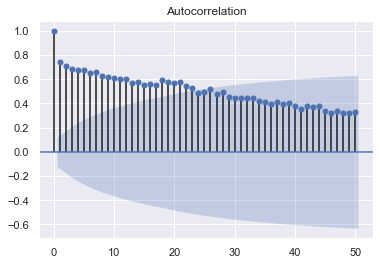

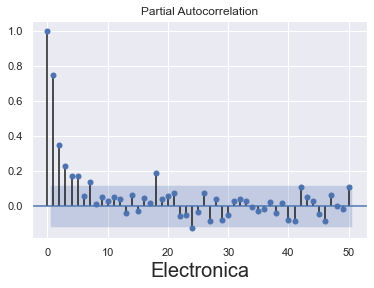

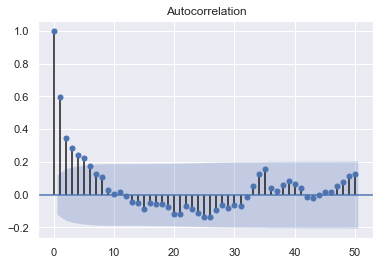

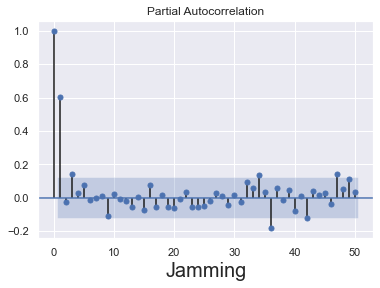

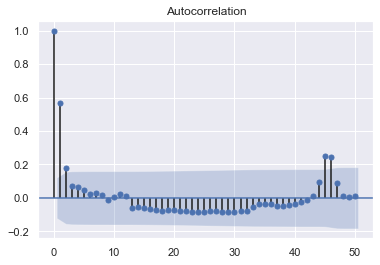

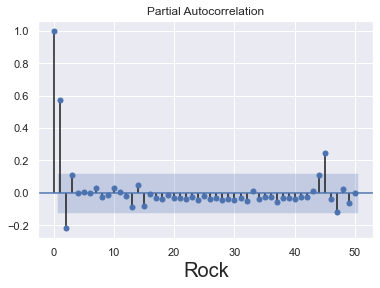

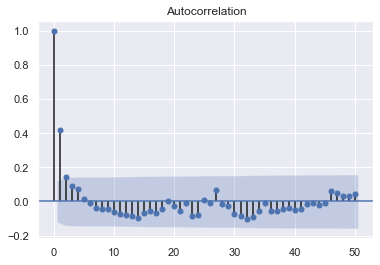

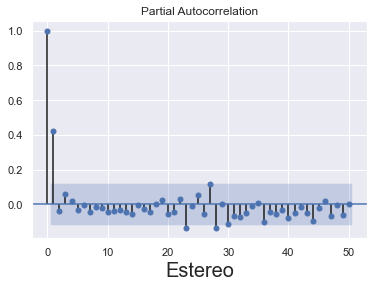

In [20]:
columns=df.columns

for c in columns:
    plot_acf(df[c], lags=50 );
    plot_pacf(df[c], lags=50);
    plt.xlabel(c, fontsize=20);
    
    

* Electronica AR orden 1 
* Jamming MA orden 1 
* Rock MA orden 1
* Estereo MA orden 1

C:\Users\caang\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\caang\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\caang\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\caang\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

C:\Users\caang\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\caang\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\caang\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\caang\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

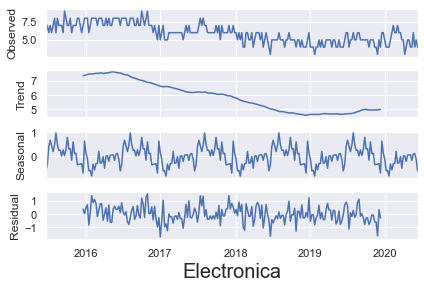

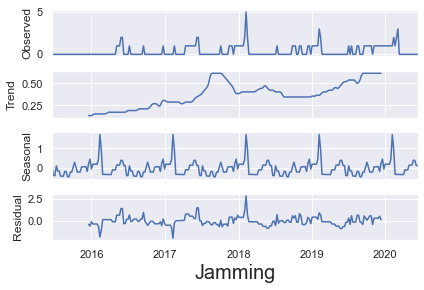

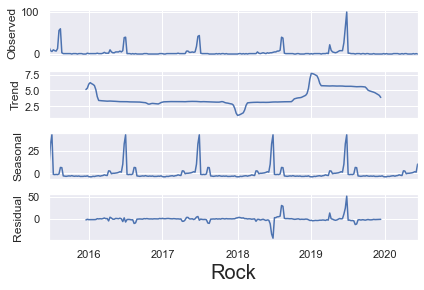

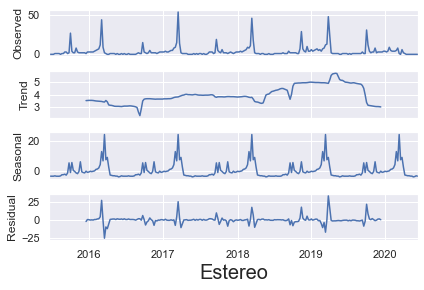

In [21]:
columns=df.columns

for c in columns:
    result = seasonal_decompose(df[c], model='additive')
    fig = result.plot()
    plt.xlabel(c, fontsize=20);
    #plot_mpl(fig)

A partir de esta funcion para graficar, podemos obervar que para la serie de eletrónica efectivamente existe estacionalidad durante el segundo semestre de cada año, lo cual, coincide con la ocurrencia de varios eventos de este genero musical. 

## ARIMA

Basados en los análisis y las gráficas anteriores. Los parámetros del modelo ARIMA se dejan en un rango de: 
* p = (0,5) Los ACF Y PACF plot, los rezagos más importantes entre 1 y 5 
* d = (0,2) Al realizar los gráficos de diferencias y los test de DF la máxima diferencia es 2 para que sean estacionarias
* q = (0,5) Los ACF Y PACF plot, los rezagos más importantes entre 1 y 5

In [ ]:
c= df.columns
modelos = list()
test_l= list()
output_l=list()

for i in c: 

    x = df[i].values
    size = int(len(x) * 0.7)
    train, test = x[0:size], x[size:len(x)]
    len(test)

    p_list = range(5)
    d_list = range(2)
    q_list = range(5)
    max_error=999999
    p_best=0
    d_best=0
    q_best=0


    for p in p_list:
        for d in d_list:
            for q in q_list:

                history = [x for x in train]
                predictions = list()
                print('p:',p,'d:',d,'q:',q)
                try:
                    for t in range(len(test)):
                        model = ARIMA(history, order=(p,d,q))
                        model_fit = model.fit(disp=0)
                        output = model_fit.forecast()
                        yhat = output[0]
                        predictions.append(yhat)
                        obs = test[t]
                        history.append(obs)
                        #print('predicted=%f, expected=%f' % (yhat, obs))

                    error = mean_squared_error(test, predictions)**0.5
                    print('Test MSE: %.3f' % error)


                    if error < max_error:
                        max_error=error
                        p_best=p
                        d_best=d
                        q_best=q
                        #print('p:',p_best,'d:',d_best,'q:',q_best)
                except Exception as e:
                    print(e)
    print('Serie:', i)                
    print('Best MSE: %.3f' % max_error)
    print('p_best:',p_best,'d_best:',d_best,'q_best:',q_best)
    modelos.append([i,model_fit, test, predictions])


# Mejores Modelos
### Serie: Estereo
Best MSE: 6.162
p_best: 2 d_best: 0 q_best: 1

### Serie: Rock
Best MSE: 12.418
p_best: 0 d_best: 0 q_best: 1

### Serie: Jamming
Best MSE: 0.588
p_best: 1 d_best: 1 q_best: 1

### Serie: Electronica
Best MSE: 0.838
p_best: 1 d_best: 1 q_best: 1

In [91]:
best_models =[['Electronica',[1,1,1]],['Jamming',[1,1,1]],['Rock',[0,0,1]],['Estereo',[2,0,1]]]
modelos_b = list()
for b in best_models: 

    x = df[b[0]].values
    size = int(len(x) * 0.7)
    train, test = x[0:size], x[size:len(x)]
    len(test)
    
    history = [x for x in train]
    predictions = list()
    print('Serie:', b[0]) 
    print('p:',b[1][0],' d:',b[1][1],' q:',b[1][2])
    try:
        for t in range(len(test)):
            model = ARIMA(history, order=(b[1][0],b[1][1],b[1][2]))
            model_fit = model.fit(disp=0)
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t]
            history.append(obs)
        error = mean_squared_error(test, predictions)**0.5
    except Exception as e:
        print(e)
    print('Best MSE: %.3f' % error)
    modelos_b.append([b[0],model_fit, test, predictions])

Serie: Electronica
p: 1  d: 1  q: 1
Best MSE: 0.838
Serie: Jamming
p: 1  d: 1  q: 1


C:\Users\caang\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\caang\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\caang\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Best MSE: 0.588
Serie: Rock
p: 0  d: 0  q: 1
Best MSE: 12.418
Serie: Estereo
p: 2  d: 0  q: 1
Best MSE: 6.162


In [92]:
for m in modelos_b:
    #model_fit = m.fit(disp=0)
    print(m[0])
    print(m[1].summary())
    #print(m[2])
    #print(m[3])
    print('\n\n\n\n')
    


Electronica
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  259
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -302.876
Method:                       css-mle   S.D. of innovations              0.778
Date:                Mon, 22 Jun 2020   AIC                            613.752
Time:                        13:03:38   BIC                            627.979
Sample:                             1   HQIC                           619.472
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0077      0.009     -0.807      0.420      -0.026       0.011
ar.L1.D.y      0.1585      0.084      1.896      0.059      -0.005       0.322
ma.L1.D.y     -0.8380      0.051    -16.

### Residuales 

                0
count  259.000000
mean     0.007897
std      0.780825
min     -2.402643
25%     -0.493041
50%      0.039870
75%      0.556854
max      2.400444


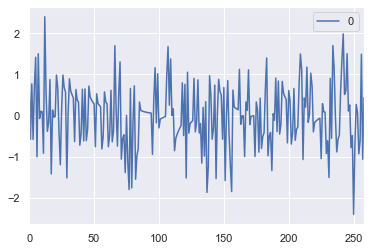

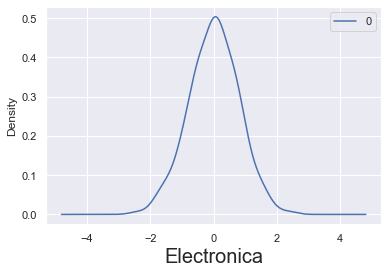

                0
count  259.000000
mean     0.008461
std      0.520044
min     -2.005203
25%     -0.189650
50%     -0.083973
75%      0.177934
max      3.667839


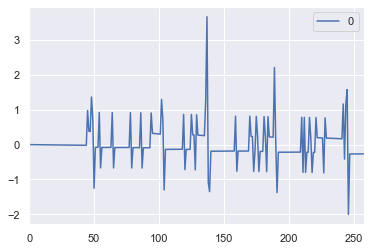

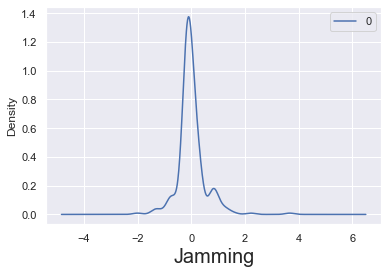

                0
count  260.000000
mean    -0.008638
std      8.820422
min    -43.135511
25%     -2.460056
50%     -1.807583
75%     -0.555253
max     68.255186


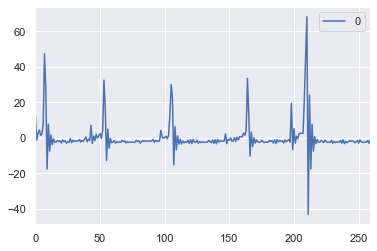

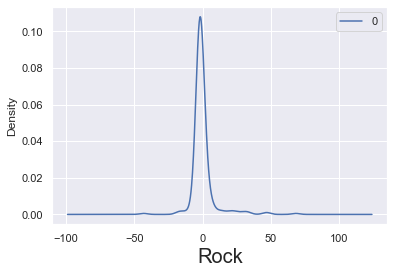

                0
count  260.000000
mean     0.005134
std      6.434260
min    -12.103926
25%     -2.211412
50%     -1.271475
75%     -0.118891
max     45.485527


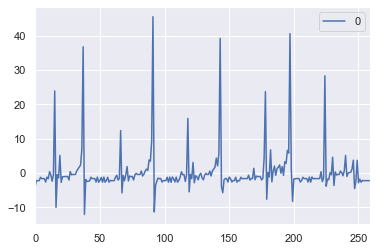

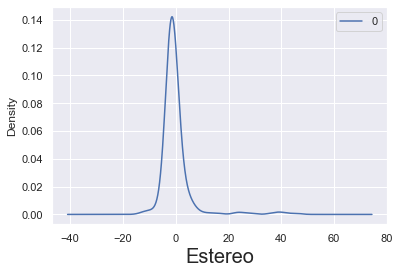

In [93]:
for m in modelos_b: 
    residuals = pd.DataFrame(m[1].resid)
    print(residuals.describe())
    residuals.plot()
    plt.show()
    residuals.plot(kind='kde')
    plt.xlabel(m[0], fontsize=20);
    plt.show()
    
    

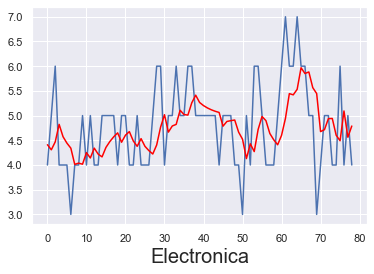

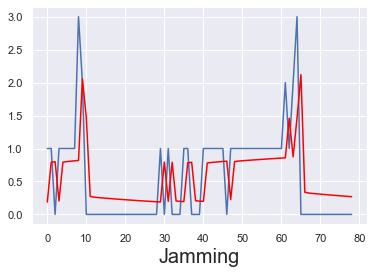

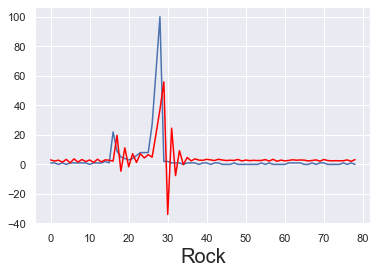

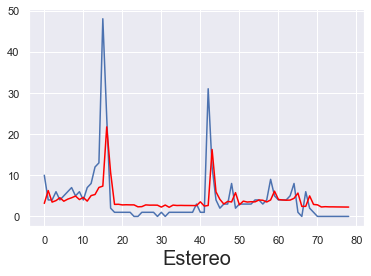

In [94]:
for m in modelos_b:
    plt.plot(m[2])
    plt.plot(m[3], color='red')
    plt.xlabel(m[0], fontsize=20);
    plt.show()

## Modelo Prophet TS Electronica

In [66]:
p_e= pd.DataFrame()

p_e['y']=df['Electronica']
p_e['ds']=df.index
p_e.head()

,y,ds
week,,
2015-06-21,6,2015-06-21
2015-06-28,7,2015-06-28
2015-07-05,6,2015-07-05
2015-07-12,7,2015-07-12
2015-07-19,6,2015-07-19


In [67]:
# division en train y test 
X1 = p_e.values
size = int(len(X1) * 0.7)
train, test = p_e[0:size], p_e[size:len(X1)]
l1=len(train)
l2=len(test)
history=train
predictions = list()
print('l1: ',l1,'l2: ',l2)

l1:  182 l2:  79


In [68]:
# Rolling forecast con prophet 
for t in range(len(test)):
    model = Prophet()
    model_fit = model.fit(history)
    future = model_fit.make_future_dataframe(periods=1, freq='M')
    future = future.iloc[[len(history)]]
    forecast = model_fit.predict(future)
    yhat = forecast[['yhat']]
    predictions.append(yhat.iloc[0,0])
    obs = test.iloc[[t]]
    history=history.append(obs)
    print("nueva longitud:",len(history))
    print('predicted=%f, expected=%f' % (yhat.iloc[0,0], obs.iloc[0,0]))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 183
predicted=4.578936, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 184
predicted=4.537575, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 185
predicted=4.631127, expected=6.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 186
predicted=4.832556, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 187
predicted=3.841104, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 188
predicted=3.830009, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 189
predicted=3.815503, expected=3.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 190
predicted=3.750904, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 191
predicted=4.134365, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 192
predicted=4.113642, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 193
predicted=4.206699, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 194
predicted=4.183468, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 195
predicted=3.864402, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 196
predicted=3.849336, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 197
predicted=3.828256, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 198
predicted=3.985326, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 199
predicted=4.246360, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 200
predicted=4.322237, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 201
predicted=4.353885, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 202
predicted=4.259745, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 203
predicted=4.398001, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 204
predicted=4.548936, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 205
predicted=4.522146, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 206
predicted=4.496875, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 207
predicted=4.625978, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 208
predicted=3.793199, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 209
predicted=3.785574, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 210
predicted=3.809959, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 211
predicted=3.939803, expected=6.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 212
predicted=4.455444, expected=6.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 213
predicted=4.467846, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 214
predicted=4.434248, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 215
predicted=4.495000, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 216
predicted=4.554666, expected=6.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 217
predicted=3.798510, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 218
predicted=3.812127, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 219
predicted=3.834622, expected=6.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 220
predicted=4.009949, expected=6.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 221
predicted=4.707188, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 222
predicted=4.736187, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 223
predicted=4.773465, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 224
predicted=4.791470, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 225
predicted=4.813155, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 226
predicted=4.274819, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 227
predicted=4.291014, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 228
predicted=4.241689, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 229
predicted=4.332658, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 230
predicted=4.088713, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 231
predicted=4.094750, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 232
predicted=4.072824, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 233
predicted=4.041955, expected=3.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 234
predicted=4.279357, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 235
predicted=4.279675, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 236
predicted=4.283745, expected=6.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 237
predicted=4.488096, expected=6.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 238
predicted=4.689274, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 239
predicted=3.570509, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 240
predicted=3.565113, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 241
predicted=3.599055, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 242
predicted=3.643660, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 243
predicted=4.184231, expected=6.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 244
predicted=4.235718, expected=7.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 245
predicted=4.447490, expected=6.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 246
predicted=4.594523, expected=6.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 247
predicted=4.481862, expected=7.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 248
predicted=4.557241, expected=6.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 249
predicted=4.625498, expected=6.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 250
predicted=4.714574, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 251
predicted=4.767887, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 252
predicted=5.014234, expected=3.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 253
predicted=4.897683, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 254
predicted=4.816723, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 255
predicted=4.809714, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 256
predicted=4.924288, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 257
predicted=4.913543, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 258
predicted=4.846245, expected=6.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 259
predicted=4.974472, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 260
predicted=4.710072, expected=5.000000
nueva longitud: 261
predicted=4.721583, expected=4.000000


In [71]:
error = mean_squared_error(test.loc[:,'y'].to_list(), predictions)**0.5
error

1.0130900016185884

In [72]:
future = model_fit.make_future_dataframe(periods=12, freq='M')
future.tail()

,ds
267,2021-01-31
268,2021-02-28
269,2021-03-31
270,2021-04-30
271,2021-05-31


In [73]:
forecast = model_fit.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
267,2021-01-31,4.224758,3.209262,5.269724
268,2021-02-28,4.897534,4.004682,5.814669
269,2021-03-31,4.575707,3.650877,5.596367
270,2021-04-30,4.734706,3.749189,5.761307
271,2021-05-31,4.864332,3.835518,5.822741


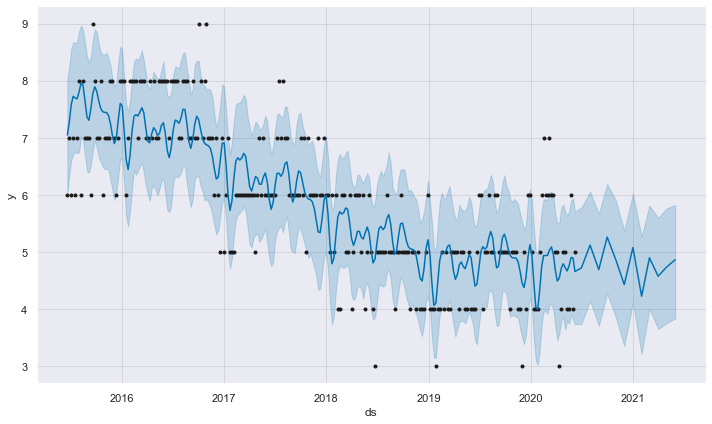

In [74]:
fig1 = model_fit.plot(forecast)

## Modelo Prophet  TS Jamming 

In [75]:
p_j= pd.DataFrame()
p_j['y']=df['Jamming']
p_j['ds']=df.index

In [76]:
# division en train y test 
X1 = p_e.values
size = int(len(X1) * 0.7)
train, test = p_j[0:size], p_j[size:len(X1)]
l1=len(train)
l2=len(test)
history=train
predictions = list()
print('l1: ',l1,'l2: ',l2)

l1:  182 l2:  79


In [77]:
# Rolling forecast con prophet 
for t in range(len(test)):
    model = Prophet()
    model_fit = model.fit(history)
    future = model_fit.make_future_dataframe(periods=1, freq='M')
    future = future.iloc[[len(history)]]
    forecast = model_fit.predict(future)
    yhat = forecast[['yhat']]
    predictions.append(yhat.iloc[0,0])
    obs = test.iloc[[t]]
    history=history.append(obs)
    print("nueva longitud:",len(history))
    print('predicted=%f, expected=%f' % (yhat.iloc[0,0], obs.iloc[0,0]))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 183
predicted=0.771516, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 184
predicted=0.815527, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 185
predicted=0.848502, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 186
predicted=0.715960, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 187
predicted=0.938920, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 188
predicted=0.954351, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 189
predicted=0.995714, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 190
predicted=1.016335, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 191
predicted=0.459247, expected=3.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 192
predicted=0.486915, expected=2.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 193
predicted=0.526640, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 194
predicted=0.413678, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 195
predicted=0.346784, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 196
predicted=0.352300, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 197
predicted=0.347994, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 198
predicted=0.300242, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 199
predicted=0.761292, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 200
predicted=0.773094, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 201
predicted=0.760778, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 202
predicted=0.711062, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 203
predicted=0.637139, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 204
predicted=1.246424, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 205
predicted=1.245455, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 206
predicted=1.190059, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 207
predicted=1.079763, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 208
predicted=0.248395, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 209
predicted=0.231387, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 210
predicted=0.179490, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 211
predicted=0.160976, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 212
predicted=0.071910, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 213
predicted=0.083059, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 214
predicted=0.068167, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 215
predicted=0.117168, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 216
predicted=0.120659, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 217
predicted=0.162092, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 218
predicted=0.162355, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 219
predicted=0.155403, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 220
predicted=0.240666, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 221
predicted=0.527514, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 222
predicted=0.524721, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 223
predicted=0.521176, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 224
predicted=0.538552, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 225
predicted=0.602880, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 226
predicted=0.273687, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 227
predicted=0.285861, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 228
predicted=0.342919, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 229
predicted=0.401352, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 230
predicted=0.470833, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 231
predicted=0.462369, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 232
predicted=0.493903, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 233
predicted=0.530961, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 234
predicted=0.904737, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 235
predicted=0.898974, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 236
predicted=0.900608, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 237
predicted=0.919591, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 238
predicted=0.939539, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 239
predicted=1.194418, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 240
predicted=1.199845, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 241
predicted=1.214147, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 242
predicted=1.227782, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 243
predicted=0.471181, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 244
predicted=0.466948, expected=2.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 245
predicted=0.486082, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 246
predicted=0.491063, expected=2.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 247
predicted=0.386099, expected=3.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 248
predicted=0.357820, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 249
predicted=0.347910, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 250
predicted=0.329264, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 251
predicted=0.292529, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 252
predicted=0.715382, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 253
predicted=0.718573, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 254
predicted=0.692483, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 255
predicted=0.637473, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 256
predicted=1.111369, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 257
predicted=1.116532, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 258
predicted=1.086317, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 259
predicted=1.023308, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 260
predicted=0.432456, expected=0.000000
nueva longitud: 261
predicted=0.437396, expected=0.000000


In [62]:
error = mean_squared_error(test.loc[:,'y'].to_list(), predictions)**0.5
error

0.7616224494274723

In [63]:
future = model_fit.make_future_dataframe(periods=12, freq='M')
future.tail()

,ds
267,2021-01-31
268,2021-02-28
269,2021-03-31
270,2021-04-30
271,2021-05-31


In [64]:
forecast = model_fit.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
267,2021-01-31,1.271864,0.588653,1.998587
268,2021-02-28,0.875127,0.160910,1.597496
269,2021-03-31,0.332611,-0.323759,1.052063
270,2021-04-30,0.639834,-0.012595,1.405850
271,2021-05-31,0.960547,0.236553,1.666459


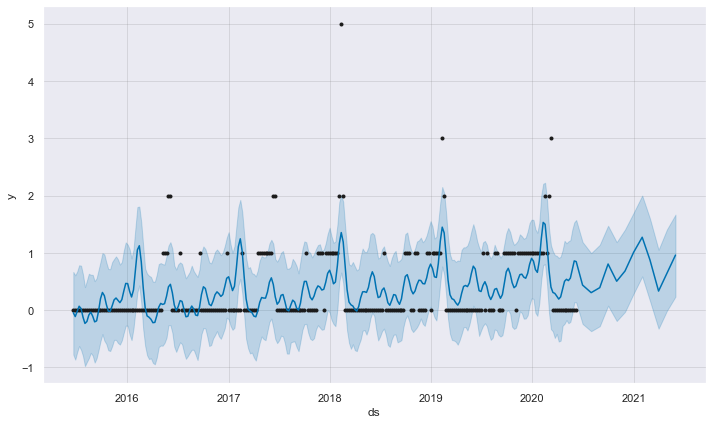

In [65]:
fig2 = model_fit.plot(forecast)

## Modelo prophet TS Rock

In [78]:
p_r= pd.DataFrame()
p_r['y']=df['Rock']
p_r['ds']=df.index

In [79]:
# division en train y test 
X1 = p_e.values
size = int(len(X1) * 0.7)
train, test = p_r[0:size], p_r[size:len(X1)]
l1=len(train)
l2=len(test)
history=train
predictions = list()
print('l1: ',l1,'l2: ',l2)

l1:  182 l2:  79


In [80]:
# Rolling forecast con prophet 
for t in range(len(test)):
    model = Prophet()
    model_fit = model.fit(history)
    future = model_fit.make_future_dataframe(periods=1, freq='M')
    future = future.iloc[[len(history)]]
    forecast = model_fit.predict(future)
    yhat = forecast[['yhat']]
    predictions.append(yhat.iloc[0,0])
    obs = test.iloc[[t]]
    history=history.append(obs)
    print("nueva longitud:",len(history))
    print('predicted=%f, expected=%f' % (yhat.iloc[0,0], obs.iloc[0,0]))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 183
predicted=-0.282578, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 184
predicted=-0.195575, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 185
predicted=0.004486, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 186
predicted=0.041710, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 187
predicted=-0.145932, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 188
predicted=-0.266363, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 189
predicted=-0.098046, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 190
predicted=0.205805, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 191
predicted=-0.928491, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 192
predicted=-1.000294, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 193
predicted=-0.808217, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 194
predicted=-0.635804, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 195
predicted=-0.662496, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 196
predicted=-0.589441, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 197
predicted=-0.619929, expected=2.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 198
predicted=-0.396489, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 199
predicted=1.669811, expected=22.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 200
predicted=1.731198, expected=9.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 201
predicted=1.860497, expected=5.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 202
predicted=1.909438, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 203
predicted=2.000810, expected=3.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 204
predicted=1.715816, expected=4.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 205
predicted=1.861346, expected=6.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 206
predicted=1.902535, expected=8.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 207
predicted=2.479593, expected=8.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 208
predicted=21.104307, expected=8.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 209
predicted=21.079908, expected=27.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 210
predicted=21.880817, expected=63.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 211
predicted=26.040446, expected=100.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 212
predicted=13.982285, expected=2.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 213
predicted=12.263677, expected=2.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 214
predicted=11.837209, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 215
predicted=11.955703, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 216
predicted=11.388383, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 217
predicted=3.433532, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 218
predicted=2.597757, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 219
predicted=1.198457, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 220
predicted=0.621825, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 221
predicted=1.429618, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 222
predicted=1.510835, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 223
predicted=1.411470, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 224
predicted=1.300870, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 225
predicted=1.098342, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 226
predicted=1.455417, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 227
predicted=1.437885, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 228
predicted=1.452976, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 229
predicted=1.109922, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 230
predicted=1.424994, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 231
predicted=1.363998, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 232
predicted=1.387592, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 233
predicted=1.121641, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 234
predicted=2.146959, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 235
predicted=2.125076, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 236
predicted=2.007099, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 237
predicted=2.026209, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 238
predicted=1.765053, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 239
predicted=2.351609, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 240
predicted=2.215913, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 241
predicted=2.305836, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 242
predicted=2.030475, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 243
predicted=1.711882, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 244
predicted=1.704655, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 245
predicted=1.716952, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 246
predicted=1.677661, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 247
predicted=3.360238, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 248
predicted=3.308408, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 249
predicted=3.340005, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 250
predicted=3.222821, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 251
predicted=3.090490, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 252
predicted=2.497152, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 253
predicted=2.428906, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 254
predicted=2.128336, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 255
predicted=1.943994, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 256
predicted=1.836823, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 257
predicted=1.833469, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 258
predicted=1.636432, expected=1.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 259
predicted=1.352150, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 260
predicted=29.001628, expected=1.000000
nueva longitud: 261
predicted=29.112189, expected=0.000000


In [81]:
error = mean_squared_error(test.loc[:,'y'].to_list(), predictions)**0.5
error

11.434262256206216

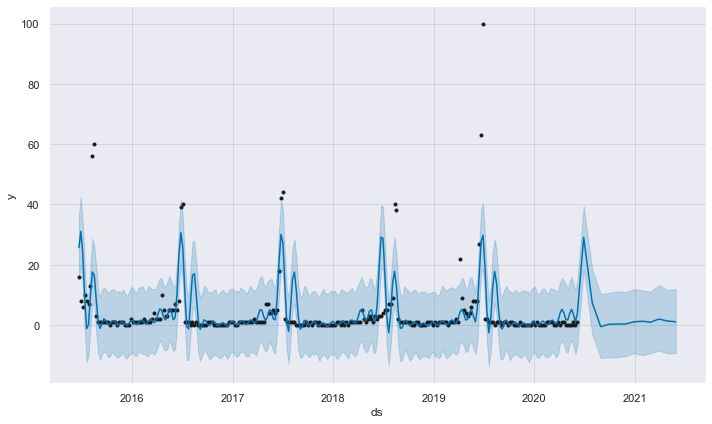

In [82]:
future = model_fit.make_future_dataframe(periods=12, freq='M')
forecast = model_fit.predict(future)
fig2 = model_fit.plot(forecast)

## Modelo prophet TS Estereo

In [83]:
p_sp= pd.DataFrame()
p_sp['y']=df['Estereo']
p_sp['ds']=df.index

In [84]:
# division en train y test 
X1 = p_e.values
size = int(len(X1) * 0.98)
train, test = p_sp[0:size], p_sp[size:len(X1)]
l1=len(train)
l2=len(test)
history=train
predictions = list()
print('l1: ',l1,'l2: ',l2)

l1:  255 l2:  6


In [85]:
# Rolling forecast con prophet 
for t in range(len(test)):
    model = Prophet()
    model_fit = model.fit(history)
    future = model_fit.make_future_dataframe(periods=1, freq='M')
    future = future.iloc[[len(history)]]
    forecast = model_fit.predict(future)
    yhat = forecast[['yhat']]
    predictions.append(yhat.iloc[0,0])
    obs = test.iloc[[t]]
    history=history.append(obs)
    print("nueva longitud:",len(history))
    print('predicted=%f, expected=%f' % (yhat.iloc[0,0], obs.iloc[0,0]))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 256
predicted=0.324647, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 257
predicted=0.332281, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 258
predicted=0.274785, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 259
predicted=0.262321, expected=0.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 260
predicted=0.289388, expected=0.000000
nueva longitud: 261
predicted=0.277065, expected=0.000000


In [86]:
error = mean_squared_error(test.loc[:,'y'].to_list(), predictions)**0.5
error

0.2945719077298586

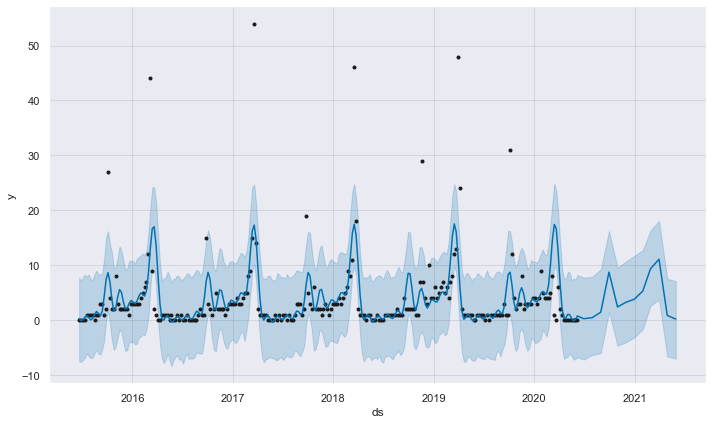

In [87]:
future = model_fit.make_future_dataframe(periods=12, freq='M')
forecast = model_fit.predict(future)
fig2 = model_fit.plot(forecast)

## Comparacion entre modelos 

<table>
    <tr>
    <th>Festival</th>
    <th>MSE:ARIMA</th>
    <th>MSE: Prophet</th>
    </tr>
    <tr>
    <th>Electrónica</th>
    <td>0.838</td>
    <td>1.013</td>
    </tr>
    <tr>
    <th>Jamming</th>
    <td>0.588</td>
    <td>0.761</td>
    </tr>
    <tr>
    <th>Rock</th>
    <td>12.418</td>
    <td>11.434</td>
    </tr>
    <tr>
    <th>Estereo</th>
    <td>6.162</td>
    <td>0.294</td>
    </tr>
    </table>


A partir de los resultados podemos observar como el modelo ARIMA predice con menos error aquellas series que no presentan una estacionalidad tan marcada. Por otro lado, el algoritmo Prophet tiene una mejor precision en las series más estacionales, esto se debe a que como se puede apreciar en las graficas Prophet logra modelar las etapas de transicion( momentos entre picos) de una manera más precisa.

## Conclusiones generales

<ol>
<li>De acuerdo a los resultados obtenidos se encontró que no existe ninguna correlacion entre las diferentes series de tiempo,por lo que de cara al inversor no existe un periodo especifico en el cual al invertir genere eficiencias en los costos de la pauta.</li> <br> 

<li>    
A partir de la prueba de Dickey Fuller encontramos que las series de busquedas del Jamming festival, Rock al Parque y el Estereo picnic son estacionales con una estacionalidad de alrededor de 50 semanas. Por otro lado, aplicando una diferencia de primer orden se encontró que la serie del comportamiento de busquedas de el genero electronica es estacionario.</li><br> 

<li>
Se encontró que el inversor deberia pautar de acuerdo a los siguientes periodos:</li> 

<ul>
    
- Jamming: Dado que se tiene una estacionalidad de 50 semanas, se deberia pautar alrededor de los meses de enero,marzo, y octubre, según los máximos locales de la serie
 
- Rock al Parque: Dado que se tiene una estacionalidad de 50 semanas, se deberia pautar alrededor de los meses de junio y agosto, según los máximos locales de la serie
 
- Estereo Picninc: Dado que se tiene una estacionalidad de 50 semanas, se deberia pautar alrededor de los meses de Abril,septiembre y octubre según los máximos locales de la serie
 
- Electrónica:Se observa un comportamiento mas estable a lo largo del año, sin embargo se deberia pautar alrededor en el segundo semestre del año. </ul><br> 


<li>
De acuerdo a los resultados obtenidos en la comparacion de los dos modelos ( ARIMA  y Prophet) vemos que los modelos ARIMA tienen un mejor compartimiento para series con menor estacionalidad, mientras que el algoritmo Prophet es más eficiente en series muy estacionarias.</li><br>  

<li>
Con los modelos generados el empresario puede estimar para cada mes proyectado el potencial de publico que revisaría la pauta contratada en internet 